## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Как можем заметить все столбцы заполнены (нет пропусков). Теперь прверим есть ли у нас категориальные переменные.

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Как можем заметить, все данные числовые, поэтому не нужно использовать **OneHotEncoder**.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(2250)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
print(f"Количество строк по классам в y_train: {np.bincount(y_train)}")
print(f"Количесвто строк по классам в y_test: {np.bincount(y_test)}") #наглядный пример утверждения снизу

Количество строк по классам в y_train: [41 50 33]
Количесвто строк по классам в y_test: [18 21 15]


Аргумент **stratify** нужен для того, чтобы разбиение было равномерно распределено.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X_1 = StandardScaler().fit_transform(X_train)
X_stan_train = pd.DataFrame(data=X_1, columns=X.columns)

X_2 = StandardScaler().fit(X_train).transform(X_test)
X_stan_test = pd.DataFrame(data=X_2, columns=X.columns)

k = [1, 3, 5, 10, 15, 25]

for_test = []
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
  knn.fit(X_stan_train[["alcohol", "magnesium"]], y_train)
  predictions_test = knn.predict(X_stan_test[["alcohol", "magnesium"]])
  score_test = np.round(accuracy_score(y_test, predictions_test),2)
  for_test.append(score_test)

for_train = []
for j in k:
  knn = KNeighborsClassifier(n_neighbors=j, metric="euclidean")
  knn.fit(X_stan_train[["alcohol", "magnesium"]], y_train)
  predictions_train = knn.predict(X_stan_train[["alcohol", "magnesium"]])
  score_train = np.round(accuracy_score(y_train, predictions_train),2)
  for_train.append(score_train)

result = pd.DataFrame({
    "NN" : k,
    "Train" : for_train,
    "Test" : for_test
})

result

,NN,Train,Test
0,1,1.00,0.59
1,3,0.82,0.70
2,5,0.81,0.76
3,10,0.77,0.69
4,15,0.74,0.67
5,25,0.71,0.70


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

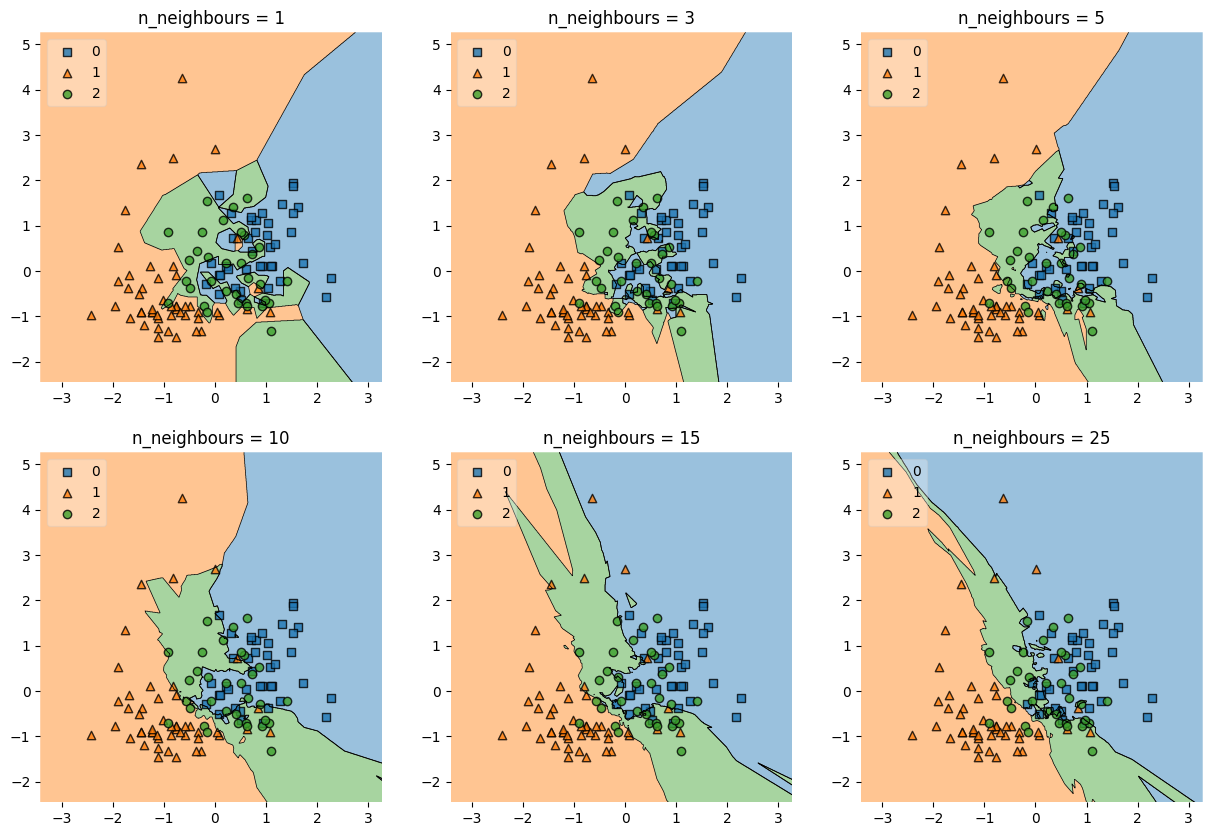

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2,3)

x_mx = np.array(X_stan_train[["alcohol", "magnesium"]])
fig = plt.figure(figsize=(15,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3','n_neighbours = 5','n_neighbours = 10','n_neighbours = 15','n_neighbours = 25']
knn_1 = KNeighborsClassifier(n_neighbors = 1, metric="euclidean")
knn_3 = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
knn_5 = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
knn_10 = KNeighborsClassifier(n_neighbors = 10, metric="euclidean")
knn_15 = KNeighborsClassifier(n_neighbors = 15, metric="euclidean")
knn_25 = KNeighborsClassifier(n_neighbors = 25, metric="euclidean")
for knn, lab, grd in zip([knn_1,knn_3,knn_5,knn_10,knn_15,knn_25],
                         labels,
                         itertools.product([0, 1,2], repeat=2)):

    knn.fit(X_stan_train[["alcohol", "magnesium"]], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_mx, y=y_train, clf=knn, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

*Вопрос 1* : Оптимальное количество **k** для обучения классификатора является **3**, так как на тестовой выборке достигает максимального значения accuracy, а при обучающей выборке второе максимальное по велечине значения accuracy (если учитывать нюансы, то на самом деле первое).

*Вопрос 2* : Переобученой модулью является k=1, так как при таком значении гиперпараметра при обучающей выборке accuracy равен 1, а при тестовой ниже 0.7.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

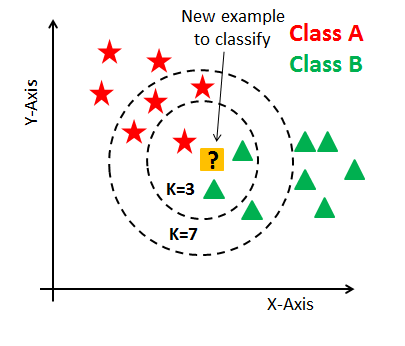

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      pred = []
      for i in X:
        dist = [self.count_distance(i, X_train) for X_train in self.X_train] # расстояние между элементами и тренировачной выборкой
        k_indexes = np.argsort(dist)[:self.k] # выбор индекса для каждого элемента из Х
        targets = self.y_train[k_indexes] # какое значение y_train будет иметь для наших индексов
        pred.append(np.bincount(targets).argmax()) # подсчет классов и вывод самого популярного
      return np.array(pred)

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/shivam2503/diamonds")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nareksargsyan
Your Kaggle Key: ··········


100%|██████████| 733k/733k [00:00<00:00, 32.3MB/s]

In [ ]:
data = pd.read_csv('/content/diamonds/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
#Проверим на пропуски
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
#Проверим есть ли категориальные переменные
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Пропусков в данных нет, но есть категориаольные данные, которые надо
закодировать.

Бессмысленным столбцом является **Unnamed: 0**, так как не содержит никакой существенной информации.

In [ ]:
data_1 = data.drop('Unnamed: 0', axis=1)
data_1.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

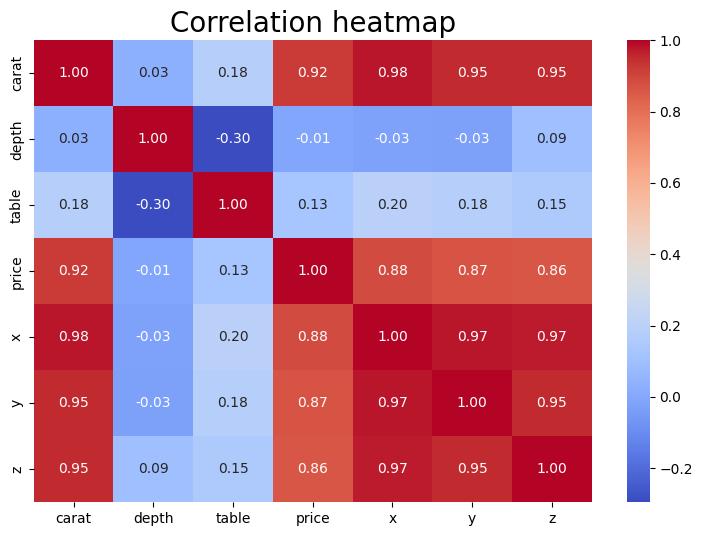

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 6))
ax = sns.heatmap(data_1.corr(), cmap="coolwarm", annot=True, fmt="0.2f")
plt.title('Correlation heatmap', fontsize=20)
for t in ax.texts:
    if np.abs(float(t.get_text())):
        t.set_text(t.get_text())
    else:
        t.set_text("")

Как мы можем заметить, почти все целевые переменные имеют сильную связь с **price**, кроме *depth* и *table*. То есть цена зависит от количества каратов, ширины, высоты и длины.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
# Закодируем через get_dummies

data_2 = pd.get_dummies(data=data_1, drop_first=True)

data_2.head(5)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
np.random.seed(2251)
y = data_2['price'] # Целевая переменная
X = data_2.loc[:, data_2.columns != 'price'] # Вещественные признаки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
X_train_1 = StandardScaler().fit_transform(X_train)
X_stan1_train = pd.DataFrame(data= X_train_1, columns = X_train.columns)

X_test_1 = StandardScaler().fit(X_train).transform(X_test)
X_stan1_test = pd.DataFrame(data= X_test_1, columns = X_test.columns)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_stan1_train, y_train)

pred_train = lr.predict(X_stan1_train)
pred_test = lr.predict(X_stan1_test)

print(f'MSE для train: {mean_squared_error(y_train, pred_train)}')
print(f'MSE для test: {mean_squared_error(y_test, pred_test)}')

MSE для train: 1277511.9471451223
MSE для test: 1275492.6235457903


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
print("Веса признаков:")
for coef, feat in zip(lr.coef_, X_stan1_train):  # Подставьте features ваших признаков
    print(f"{feat}: {coef}")
print("Свободный член:", lr.intercept_)

Веса признаков:
carat: 5323.161483815485
depth: -89.17047239367378
table: -61.6844919767017
x: -1114.5930596015476
y: -2.3936846273711887
z: -37.745629605357735
cut_Fair: -121.08264754729596
cut_Good: -38.6477488491329
cut_Ideal: 50.49087473570296
cut_Premium: 15.333393249914671
cut_Very Good: 0.735896797410077
color_D: 206.33131067175896
color_E: 157.60858101095278
color_F: 135.72940679581342
color_G: 58.430464242489
color_H: -124.91280867886184
color_I: -250.77454145576812
color_J: -380.73242012639685
clarity_I1: -473.29640238763017
clarity_IF: 229.65018927449398
clarity_SI1: -142.08464106472582
clarity_SI2: -487.01589496011945
clarity_VS1: 201.24092618869636
clarity_VS2: 109.37524656033192
clarity_VVS1: 247.91195987686848
clarity_VVS2: 271.15538122953666
Свободный член: 3925.2374066423013


Свободный член, коэффициент количесвта карат и длины (х) по модулю значительно больще остальных коэффициентов.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_lr = Lasso(10).fit(X_stan1_train, y_train)
ridge_lr = Ridge(10).fit(X_stan1_train, y_train)

pred_lasso_lr_train = lasso_lr.predict(X_stan1_train)
pred_lasso_lr_test = lasso_lr.predict(X_stan1_test)

pred_ridge_lr_train = ridge_lr.predict(X_stan1_train)
pred_ridge_lr_test = ridge_lr.predict(X_stan1_test)

print(f"MSE для train в Lasso регрессии {mean_squared_error(y_train, pred_lasso_lr_train)}")
print(f"MSE для test в Lasso регрессии {mean_squared_error(y_test, pred_lasso_lr_test)}")
print("")
print(f"MSE для train в Ridge регрессии {mean_squared_error(y_train, pred_ridge_lr_train)}")
print(f"MSE для test в Ridge регрессии {mean_squared_error(y_test, pred_ridge_lr_test)}")

MSE для train в Lasso регрессии 1288920.7300903588
MSE для test в Lasso регрессии 1291710.5130339416

MSE для train в Ridge регрессии 1277577.6169915078
MSE для test в Ridge регрессии 1275773.8518300147


In [ ]:
print("Веса признаков при Lasso регрессии:")
print('')
for coef, feat in zip(lasso_lr.coef_, X_stan1_train):
  print(f"{feat}: {coef}")
print('')
print(f"Свободный член: {lasso_lr.intercept_}")

Веса признаков при Lasso регрессии:

carat: 4850.030454026878
depth: -56.37434006261032
table: -48.810198910691106
x: -652.9568008403703
y: -0.0
z: -49.17969727424351
cut_Fair: -121.62655155539036
cut_Good: -39.25622789838519
cut_Ideal: 41.530848210877906
cut_Premium: 0.0
cut_Very Good: -0.0
color_D: 141.74241004946188
color_E: 85.59438548944104
color_F: 63.700360364722535
color_G: -0.0
color_H: -168.9185509328752
color_I: -279.71990056141436
color_J: -397.4612485231857
clarity_I1: -490.4185172404039
clarity_IF: 176.76235175482148
clarity_SI1: -254.80883179192983
clarity_SI2: -576.5136740381796
clarity_VS1: 95.0115304154365
clarity_VS2: -0.0
clarity_VVS1: 177.78699826253177
clarity_VVS2: 188.06065376463027

Свободный член: 3925.237406642301


In [ ]:
print("Веса признаков для Ridgе регрессии:")
print('')
for coef, feat in zip(ridge_lr.coef_, X_stan1_train):
  print(f"{feat}: {coef}")
print('')
print(f"Свободный член: {ridge_lr.intercept_}")

Веса признаков для Ridgе регрессии:

carat: 5285.198213000311
depth: -86.62494600129834
table: -61.46612476315647
x: -1071.0542552476124
y: -4.766457109321967
z: -42.01864689569188
cut_Fair: -121.22882823906062
cut_Good: -38.722044760710645
cut_Ideal: 50.46892603912873
cut_Premium: 15.311230089059741
cut_Very Good: 0.8960642872592846
color_D: 206.103080813574
color_E: 157.3486095902554
color_F: 135.297007130559
color_G: 58.160118729179956
color_H: -124.6645141464154
color_I: -250.0980434762722
color_J: -380.0196286909215
clarity_I1: -472.7553835617022
clarity_IF: 230.00167625698575
clarity_SI1: -142.5990369542618
clarity_SI2: -486.9060343754954
clarity_VS1: 201.06063618812877
clarity_VS2: 109.19434365407025
clarity_VVS1: 248.409190567048
clarity_VVS2: 271.3917427844143

Свободный член: 3925.2374066423013


Как мы можем заметить, в **Ridge** изменения в весах минимальные, а функционал ошибки почти не изменился.

В **Lasso**, вес у длины (х) значительно уменьшился, а у карат изменение небольшое. Некоторые коэффициенты также занулились. При этом MSE увеличелось, что говорит о плохом качестве модели при Лямбда равной 10. Скорее всего модель занулила важные признаки.


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

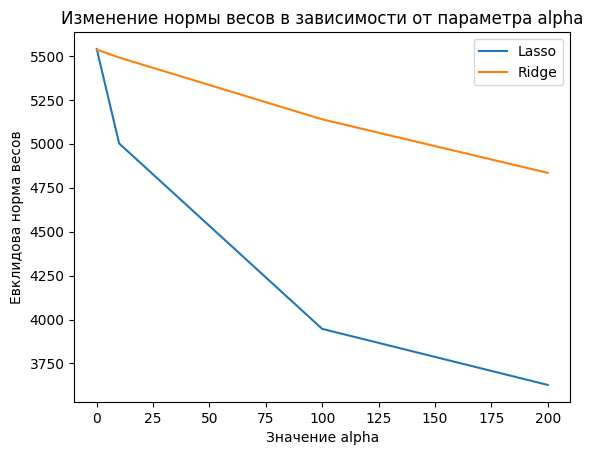

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

# Обучение моделей и вычисление норм весов
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    lasso_model.fit(X_stan1_train, y_train)
    ridge_model.fit(X_stan1_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso_model.coef_))
    ridge_norms.append(np.linalg.norm(ridge_model.coef_))

# Построение графика
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Значение alpha')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение нормы весов в зависимости от параметра alpha')
plt.legend()
plt.show()

Согласно графику,веса агрессивнее уменьшаются при Lasso регрессии. Люди часто используют данный метод для построения линейной регресии, так как она сильнее штрафует за ошибки, а также зануляет коэффициенты, которые могут быть бесполезными.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv_lr = LassoCV(cv=5).fit(X_stan1_train, y_train)

alphas = lasso_cv_lr.alphas_
mse_values = np.mean(lasso_cv_lr.mse_path_, axis=1) #По строкам

optimal_alpha = alphas[np.argmin(mse_values)] #арнумент альфа для минимальной ошибки
print(f"Оптимальная альфа: {optimal_alpha}")

Оптимальная альфа: 3.6715512102148424


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso_lr_2 = Lasso(optimal_alpha).fit(X_stan1_train, y_train)

print("Вещественные переменные:")
print('')
for coef, feat in zip(lasso_lr_2.coef_, X_stan1_train):
  print(f"{feat}: {coef}")
print('')
print(f"Свободный член: {lasso_lr_2.intercept_}")

Вещественные переменные:

carat: 5148.243905744756
depth: -77.11404335067905
table: -56.82730196886299
x: -944.9254672577998
y: -0.0
z: -42.39537587157874
cut_Fair: -124.7978968409603
cut_Good: -44.86782817718066
cut_Ideal: 37.08333619046813
cut_Premium: 0.0
cut_Very Good: -7.544668431786825
color_D: 152.38709773454966
color_E: 96.02087337286835
color_F: 74.41638826754364
color_G: -0.0
color_H: -173.95957208699124
color_I: -288.835392097483
color_J: -406.9900780878577
clarity_I1: -498.90720082150335
clarity_IF: 180.93080394204517
clarity_SI1: -254.34561422372008
clarity_SI2: -581.9923849030773
clarity_VS1: 103.35801824770367
clarity_VS2: -0.0
clarity_VVS1: 180.79962698688198
clarity_VVS2: 192.33203189754428

Свободный член: 3925.2374066423013


Как мы можем заметить, некоторые коэффициенты действительно занулились (например коэффициент для золотого цвет, некоторый вид ясности и разреза, а также ширину). Наиболее информативным является количество карат бриллианта, так как коэффициент имеет очень большое значение по сравнению с остальными константами.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
pred_lasso_lr_2 = lasso_lr_2.predict(X_stan1_test)

print(f"MSE для test при опттмальной Lasso: {mean_squared_error(pred_lasso_lr_2, y_test)}")
print(f'MSE для test: {mean_squared_error(y_test, pred_test)}')

MSE для test при опттмальной Lasso: 1278751.6042351953
MSE для test: 1275492.6235457903


Изначальная модель оказалась лучше, чем Lasso regression, так как MSE у нее на 3000 меньше. Можно предположить, что Лассо регрессия занулила значения, которые на самом деле были важны для модели, поэтому обычная линейная регрессия лучше на данном примере.